In [92]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

# from leitmotifs.lama import *

import pandas as pd
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
def read_data():
    df1 = pd.read_csv("../tests/results/motion_precision.csv", index_col=0)
    df2 = pd.read_csv("../tests/results/birdsounds_precision.csv", index_col=0)
    df3 = pd.read_csv("../tests/results/soundtracks_precision.csv", index_col=0)
    df4 = pd.read_csv("../tests/results/audio_precision.csv", index_col=0)
    df = pd.concat([df1, df2, df3, df4])
    df.reset_index(inplace=True, drop=True)
    df.drop(df[df.Method == "LAMA (naive)"].index, inplace=True)
    df.Precision = df.Precision * 100
    df.Recall = df.Recall * 100

    return df

df = read_data()
df

,Dataset,Method,Precision,Recall
0,Boxing,LAMA,90.00,90.0
2,Boxing,mSTAMP+MDL,100.00,20.0
3,Boxing,mSTAMP,100.00,20.0
4,Boxing,EMD*,80.00,80.0
5,Boxing,K-Motifs (TOP-f),70.00,70.0
...,...,...,...,...
105,Queen David Bowie - Under Pressure,K-Motifs (TOP-f),75.00,100.0
106,Queen David Bowie - Under Pressure,K-Motifs (all),81.25,100.0
107,Queen David Bowie - Under Pressure,LAMA (cid),12.50,100.0
108,Queen David Bowie - Under Pressure,LAMA (ed),6.25,100.0


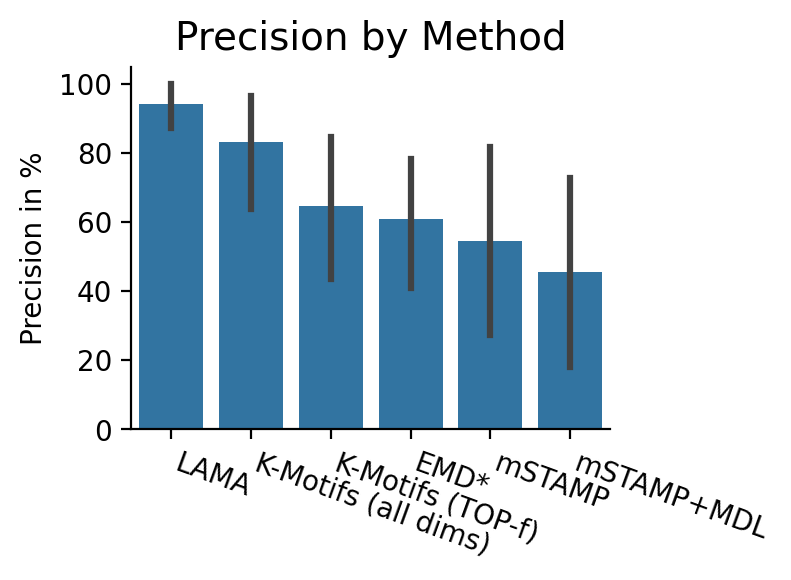

In [115]:
df = read_data()
df.Method[df.Method == "K-Motifs (TOP-N)"] = "K-Motifs (TOP-f dims)"
df.Method[df.Method == "K-Motifs (all)"] = "K-Motifs (all dims)"

# filter
with_distances = ["LAMA (cid)", "LAMA (ed)", "LAMA (cosine)"]
df = df[~df.Method.isin(with_distances)]

fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=df.Method, y=df.Precision, ax=ax, 
            order=df[["Method", "Precision"]].groupby("Method").mean().sort_values(by="Precision", ascending=False).reset_index()["Method"])
ax.set_title("Precision by Method", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=-20, fontsize=10, ha='left')
plt.xlabel("")
plt.ylabel("Precision in %")
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/barplot_precision.pdf")

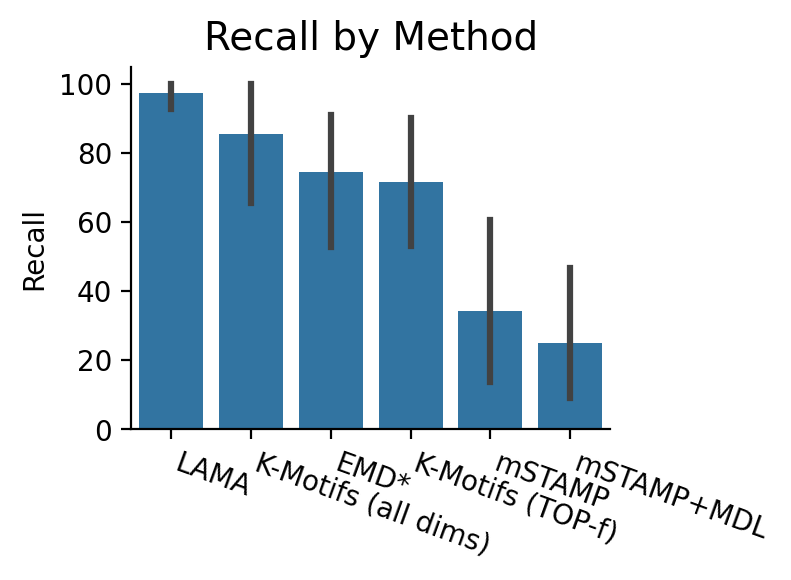

In [106]:
fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=df.Method, y=df.Recall, ax=ax, 
            order=df[["Method", "Recall"]].groupby("Method").mean().sort_values(by="Recall", ascending=False).reset_index()["Method"])
ax.set_title("Recall by Method", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=-20, fontsize=10, ha='left')
plt.xlabel("")
plt.ylabel("Recall in %")
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/barplot_recall.pdf")

In [107]:
print(df.groupby(df.Method)[["Precision", "Recall"]].agg(["mean", "median"]))

                     Precision            Recall       
                          mean median       mean median
Method                                                 
EMD*                 60.871212   65.0  74.545455   80.0
K-Motifs (TOP-f)     64.632035   75.0  71.515152  100.0
K-Motifs (all dims)  83.143939  100.0  85.454545  100.0
LAMA                 94.204545  100.0  97.272727  100.0
mSTAMP               54.545455  100.0  34.242424   20.0
mSTAMP+MDL           45.454545    0.0  25.151515    0.0


In [108]:
print(df.groupby(df.Method)[["Precision", "Recall"]].agg(["mean", "median"]).to_latex())

\begin{tabular}{lrrrr}
\toprule
 & \multicolumn{2}{r}{Precision} & \multicolumn{2}{r}{Recall} \\
 & mean & median & mean & median \\
Method &  &  &  &  \\
\midrule
EMD* & 60.871212 & 65.000000 & 74.545455 & 80.000000 \\
K-Motifs (TOP-f) & 64.632035 & 75.000000 & 71.515152 & 100.000000 \\
K-Motifs (all dims) & 83.143939 & 100.000000 & 85.454545 & 100.000000 \\
LAMA & 94.204545 & 100.000000 & 97.272727 & 100.000000 \\
mSTAMP & 54.545455 & 100.000000 & 34.242424 & 20.000000 \\
mSTAMP+MDL & 45.454545 & 0.000000 & 25.151515 & 0.000000 \\
\bottomrule
\end{tabular}



In [109]:
print(df.groupby(df.Method)[["Precision", "Recall"]].agg(["mean", "median"]).to_markdown())

| Method              |   ('Precision', 'mean') |   ('Precision', 'median') |   ('Recall', 'mean') |   ('Recall', 'median') |
|:--------------------|------------------------:|--------------------------:|---------------------:|-----------------------:|
| EMD*                |                 60.8712 |                        65 |              74.5455 |                     80 |
| K-Motifs (TOP-f)    |                 64.632  |                        75 |              71.5152 |                    100 |
| K-Motifs (all dims) |                 83.1439 |                       100 |              85.4545 |                    100 |
| LAMA                |                 94.2045 |                       100 |              97.2727 |                    100 |
| mSTAMP              |                 54.5455 |                       100 |              34.2424 |                     20 |
| mSTAMP+MDL          |                 45.4545 |                         0 |              25.1515 |                  

# Compare different Distance Measures

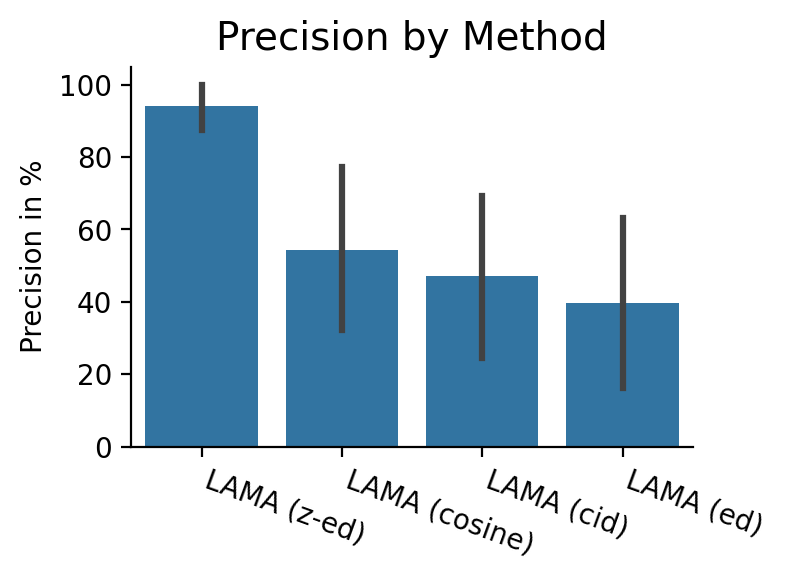

In [112]:
df = read_data()
df.Method[df.Method == "LAMA"] = "LAMA (z-ed)"

# filter
with_distances = ["LAMA (z-ed)", "LAMA (cid)", "LAMA (ed)", "LAMA (cosine)"]
df = df[df.Method.isin(with_distances)]

fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=df.Method, y=df.Precision, ax=ax, 
            order=df[["Method", "Precision"]].groupby("Method").mean().sort_values(by="Precision", ascending=False).reset_index()["Method"])
ax.set_title("Precision by Method", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=-20, fontsize=10, ha='left')
plt.xlabel("")
plt.ylabel("Precision in %")
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/barplot_precision_distances.pdf")

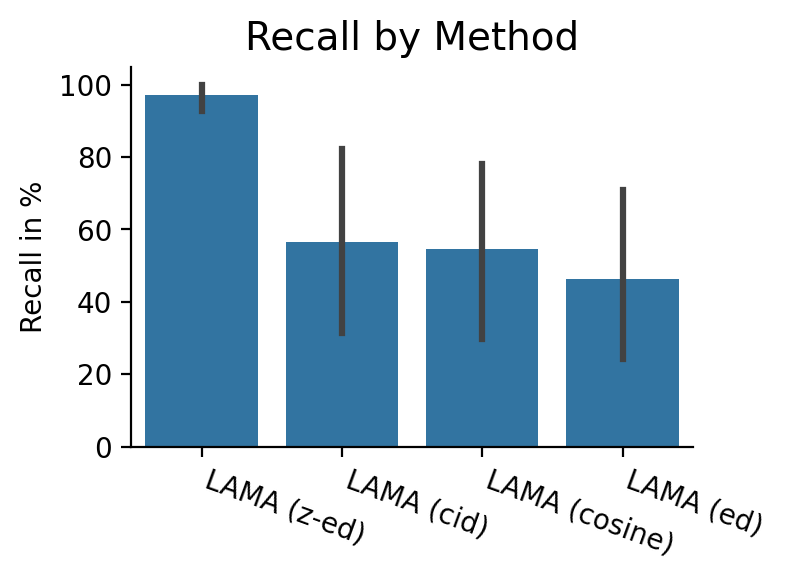

In [113]:
fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=df.Method, y=df.Recall, ax=ax, 
            order=df[["Method", "Recall"]].groupby("Method").mean().sort_values(by="Recall", ascending=False).reset_index()["Method"])
ax.set_title("Recall by Method", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=-20, fontsize=10, ha='left')
plt.xlabel("")
plt.ylabel("Recall in %")
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/barplot_recall_distances.pdf")

In [101]:
#datasets = ["common-starling-sturnus-vulgaris.csv",
#"Lord-of-the-Rings-Symphony-The-Shire.csv",
#"Star_Wars_The_Imperial_March_Theme_Song.csv",
#"The-Rolling-Stones-Paint-It-Black.csv",
#"Numb-Linkin-Park.csv",
#"Queen-David-Bowie-Under-Pressure.csv",
#"Vanilla_Ice-Ice_Ice_Baby.csv",
#"What-I-ve-Done-Linkin-Park.csv"]

#for d in datasets:
#    df2 = pd.read_csv("../datasets/audio/"+d, index_col=0, compression='gzip')
#    print(d, df2.shape)

In [102]:
# df[("LAMA" == df.Method) | ("LAMA (naive)" == df.Method)]

In [103]:
# df[("LAMA" == df.Method) | ("LAMA (naive)" == df.Method)]